# **Lab 11**
# CS 391 E1: Foundations of Data Science, Spring 2021
### Dr. Dora Erdos (Instructor), Hannah Catabia (Teaching Fellow)

## **Clustering**


Text(0.5, 1.0, 'Iris petals')

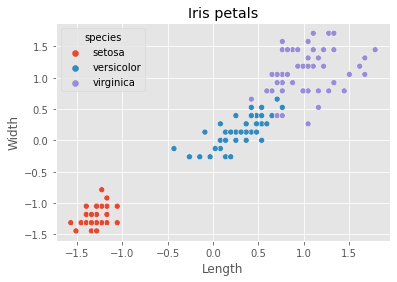

In [186]:
import pandas as pd
import numpy as np
np.set_printoptions(suppress=True)
from numpy.linalg import svd, norm
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns
from sklearn.datasets import make_blobs


pd.set_option("display.max_rows", None, "display.max_columns", None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

iris = pd.read_csv('https://raw.githubusercontent.com/catabia/cs391_spring21/main/iris.csv')

# scale the data!
from sklearn.preprocessing import scale
petal = scale(iris[['petal_length', 'petal_width']])
sepal = scale(iris[['sepal_length', 'sepal_width']])

sns.scatterplot(x=petal[:,0], y=petal[:,1], hue=iris.species)
plt.xlabel('Length')
plt.ylabel('Width')
plt.title('Iris petals')

Text(0, 0.5, 'Width')

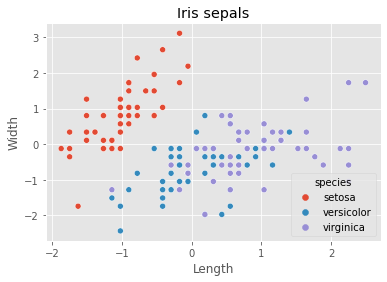

In [198]:
sns.scatterplot(x=sepal[:,0], y=sepal[:,1], hue=iris.species)
plt.title('Iris sepals')
plt.xlabel("Length")
plt.ylabel('Width')

### **K-means**



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


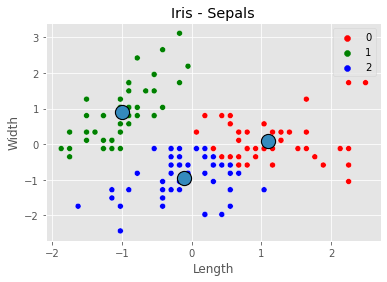

In [193]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=8, n_init=1)
km.fit(sepal)

sns.scatterplot(x=sepal[:,0], y=sepal[:,1], hue=km.labels_, palette=['red', 'green', 'blue'])
sns.scatterplot(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], ec='black', s=200)
plt.xlabel('Length')
plt.ylabel('Width')
plt.title('Iris - Sepals')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


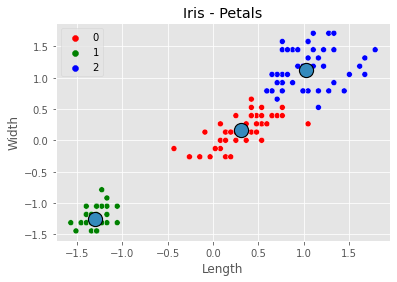

In [194]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters =3, random_state=8)
km.fit(petal)

sns.scatterplot(x=petal[:,0], y=petal[:,1],  hue=km.labels_, palette=['red', 'green', 'blue'])
sns.scatterplot(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], ec='black', s=200, markers = ['+'])
plt.xlabel('Length')
plt.ylabel('Width')
plt.title('Iris - Petals')
plt.show()

### **K-medoids**

In [169]:
!pip install scikit-learn-extra

/usr/local/lib/python3.7/dist-packages/sklearn_extra/cluster/_k_medoids.py:235: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  "its corresponding cluster ({k}).".format(k=k)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


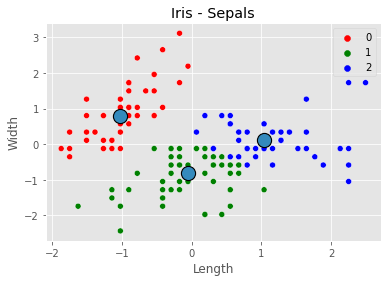

In [195]:
from sklearn_extra.cluster import KMedoids

km = KMedoids(n_clusters=3, random_state=8)
km.fit(sepal)

sns.scatterplot(x=sepal[:,0], y=sepal[:,1], hue=km.labels_, palette=['red', 'green', 'blue'])
sns.scatterplot(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], ec='black', s=200)
plt.xlabel('Length')
plt.ylabel('Width')
plt.title('Iris - Sepals')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


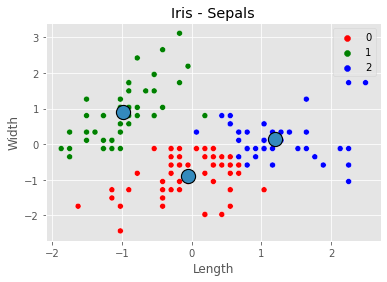

In [196]:
km = KMeans(n_clusters =3, random_state=8)
km.fit(sepal)

sns.scatterplot(x=sepal[:,0], y=sepal[:,1], hue=km.labels_, palette=['red', 'green', 'blue'])
sns.scatterplot(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], ec='black', s=200)
plt.xlabel('Length')
plt.ylabel('Width')
plt.title('Iris - Sepals')
plt.show()

### **How many clusters?**


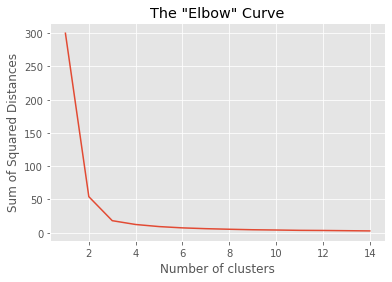

In [201]:
sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(petal)
    sum_of_squared_distances.append(km.inertia_)

ax = sns.lineplot(x=K, y=sum_of_squared_distances)
ax.set(xlabel='Number of clusters', ylabel='Sum of Squared Distances', title = 'The "Elbow" Curve')
plt.show()

## **Graphs and ranking node "importance"**

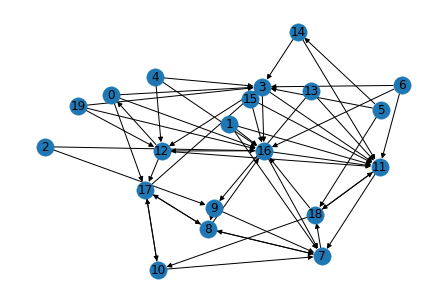

In [179]:
import networkx as nx

G = nx.random_k_out_graph(n=20, k=3, alpha=.5, seed=34)
G = nx.DiGraph(G)
nx.draw(G, with_labels=True)


### **Degree centrality**

In [180]:
from networkx.algorithms.centrality import degree_centrality

c = degree_centrality(G)
sort_c = sorted(c.items(), key=lambda x: x[1], reverse=True)
print(c)
print(sort_c)


{0: 0.21052631578947367, 1: 0.15789473684210525, 2: 0.10526315789473684, 3: 0.5263157894736842, 4: 0.15789473684210525, 5: 0.15789473684210525, 6: 0.15789473684210525, 7: 0.42105263157894735, 8: 0.3157894736842105, 9: 0.21052631578947367, 10: 0.3157894736842105, 11: 0.6842105263157894, 12: 0.3684210526315789, 13: 0.10526315789473684, 14: 0.15789473684210525, 15: 0.10526315789473684, 16: 0.6842105263157894, 17: 0.3684210526315789, 18: 0.3157894736842105, 19: 0.15789473684210525}
[(11, 0.6842105263157894), (16, 0.6842105263157894), (3, 0.5263157894736842), (7, 0.42105263157894735), (12, 0.3684210526315789), (17, 0.3684210526315789), (8, 0.3157894736842105), (10, 0.3157894736842105), (18, 0.3157894736842105), (0, 0.21052631578947367), (9, 0.21052631578947367), (1, 0.15789473684210525), (4, 0.15789473684210525), (5, 0.15789473684210525), (6, 0.15789473684210525), (14, 0.15789473684210525), (19, 0.15789473684210525), (2, 0.10526315789473684), (13, 0.10526315789473684), (15, 0.10526315789473

### **Eigenvector centrality**

In [181]:
e = nx.eigenvector_centrality(G)
sort_e = sorted(e.items(), key=lambda x: x[1], reverse=True)
print(e)
print(sort_e)

{0: 0.05025074394540463, 1: 1.5272010520603004e-15, 2: 1.5272010520603004e-15, 3: 0.120184616552476, 4: 1.5272010520603004e-15, 5: 1.5272010520603004e-15, 6: 1.5272010520603004e-15, 7: 0.4934205895647553, 8: 0.27700198462427117, 9: 7.483285155095474e-14, 10: 0.34860052201288083, 11: 0.4876679512210701, 12: 0.14201564908925346, 13: 1.5272010520603004e-15, 14: 3.818002630150751e-14, 15: 1.5272010520603004e-15, 16: 0.2811655400333751, 17: 0.28940228246843325, 18: 0.34715702758636885, 19: 1.5272010520603004e-15}
[(7, 0.4934205895647553), (11, 0.4876679512210701), (10, 0.34860052201288083), (18, 0.34715702758636885), (17, 0.28940228246843325), (16, 0.2811655400333751), (8, 0.27700198462427117), (12, 0.14201564908925346), (3, 0.120184616552476), (0, 0.05025074394540463), (9, 7.483285155095474e-14), (14, 3.818002630150751e-14), (1, 1.5272010520603004e-15), (2, 1.5272010520603004e-15), (4, 1.5272010520603004e-15), (5, 1.5272010520603004e-15), (6, 1.5272010520603004e-15), (13, 1.527201052060300

### **Pagerank**

In [182]:
from networkx.algorithms.link_analysis.pagerank_alg import pagerank

p = pagerank(G)
sort_p = sorted(p.items(), key=lambda x: x[1], reverse=True)
print(p)
print(sort_p)

{0: 0.023134211573414318, 1: 0.0075000000000000015, 2: 0.0075000000000000015, 3: 0.04997763967505314, 4: 0.0075000000000000015, 5: 0.0075000000000000015, 6: 0.0075000000000000015, 7: 0.1424946865653743, 8: 0.09728958473273414, 9: 0.013875000000000004, 10: 0.08857684097037899, 11: 0.15896777470279, 12: 0.055180518803284825, 13: 0.0075000000000000015, 14: 0.009625000000000002, 15: 0.0075000000000000015, 16: 0.10330221059895803, 17: 0.08235101363106839, 18: 0.11522551874694376, 19: 0.0075000000000000015}
[(11, 0.15896777470279), (7, 0.1424946865653743), (18, 0.11522551874694376), (16, 0.10330221059895803), (8, 0.09728958473273414), (10, 0.08857684097037899), (17, 0.08235101363106839), (12, 0.055180518803284825), (3, 0.04997763967505314), (0, 0.023134211573414318), (9, 0.013875000000000004), (14, 0.009625000000000002), (1, 0.0075000000000000015), (2, 0.0075000000000000015), (4, 0.0075000000000000015), (5, 0.0075000000000000015), (6, 0.0075000000000000015), (13, 0.0075000000000000015), (15,